# MASTER DATA EXPLORATION AND MODEL BUILDING 


In [1]:
# import required libraries
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime 
import requests
import csv
import pprint
import requests

import pandas as pd                        
from pytrends.request import TrendReq
import tweepy
import json
import re
import os
import OpenBlender
from io import StringIO

import sweetviz 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.tokenize import TweetTokenizer


sns.set()

sns.set_style('whitegrid')

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# This actually makes autocomplete WAY faster ...
%config Completer.use_jedi = False

import plotly.express as px

import re
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from textblob import TextBlob



# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# nltk.download([
#     "names",
#     "stopwords",
#     "state_union",
#      "twitter_samples",
#    "movie_reviews",
#    "averaged_perceptron_tagger",
#    "vader_lexicon",
#    "punkt" ])








# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE


#regularization libraries


from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [209]:
#Loadind the master_data_file for bitcoin 

In [2]:
bitcoin_master_df = pd.read_excel("bitcoin_master_data.xlsx")

bitcoin_master_df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


In [4]:
#checking of null values 

bitcoin_master_df.isnull().sum()

#no null values found good to go for next thing 

Name                   0
Symbol                 0
Date                   0
High                   0
Low                    0
Open                   0
Close                  0
market_billion_usd$    0
volume_billion_usd$    0
Day_Pct%_Change        0
Trend                  0
Target                 0
polarity               0
subjectivity           0
dtype: int64

# Is Dataset Imbalanced ?

# ●Data is imbalanced if
# there are more records of one class compared to other classes
# ●Imbalanced data may lead to the accuracy paradox 



<AxesSubplot:xlabel='Target', ylabel='count'>

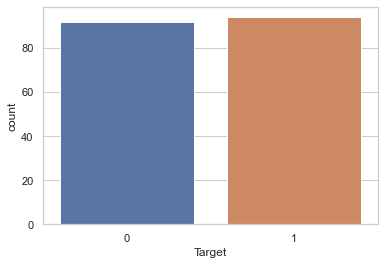

In [5]:
#checking for balance dataset i,e distribution of target variable

sns.countplot(bitcoin_master_df["Target"])

In [6]:

#checking for value counts and percentange distribution of target variables

print("value counts of target variable : \n \n \b \b \b \b \b \b",bitcoin_master_df["Target"].value_counts())

print("********************\n")

print("percentage distribution of target variable : \n \n",bitcoin_master_df["Target"].value_counts(normalize=True)*100)

value counts of target variable : 
 
       1    94
0    92
Name: Target, dtype: int64
********************

percentage distribution of target variable : 
 
 1   50.537634
0   49.462366
Name: Target, dtype: float64


In [7]:
bitcoin_master_df.polarity.describe()

count   186.000000
mean      0.087058
std       0.022952
min      -0.041589
25%       0.074016
50%       0.084314
75%       0.097465
max       0.214729
Name: polarity, dtype: float64

In [8]:
bitcoin_master_df.subjectivity.describe()

count   186.000000
mean      0.273811
std       0.024199
min       0.195050
25%       0.258840
50%       0.271902
75%       0.290178
max       0.356854
Name: subjectivity, dtype: float64

In [9]:
bitcoin_master_df["Target"] =  bitcoin_master_df["Target"].astype("category")

bitcoin_master_df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


# Analyzing trends between  polarity and closing price 
# Analyzing trends between  polarity and daily percentage change 

<Figure size 72x1440 with 0 Axes>

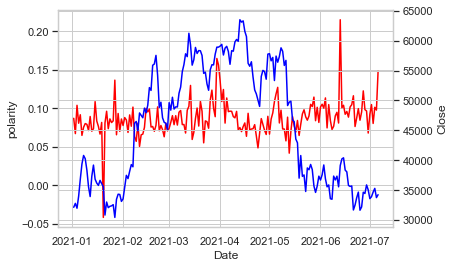

In [10]:
#Analyzing trends between  polarity and closing price 

plt.figure(figsize=(1,20))

fig,ax = plt.subplots()


sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["polarity"], color="red",ax=ax)

ax2=ax.twinx()

sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["Close"],color="blue",ax=ax2)

plt.show()


fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

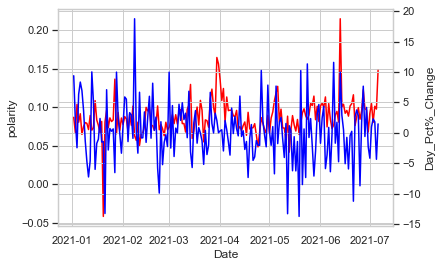

In [11]:

#Analyzing trends between  polarity and daily percentage change 
# plt.figure(figsize=(10,20))

fig,ax = plt.subplots()


sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["polarity"],markers=True ,color="red")

ax2=ax.twinx()

sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["Day_Pct%_Change"],markers = True,color="blue")

plt.show()


fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

#Inferences :

from line plot it is looking like there seems to be somewhat similar pattern between sentiments and 
date 

so as whenver sentiments are increasing closing price also seems to be fluctuating in similar trend to sentiments 

also sentiments predicted fall in closing price in mid of january in very accurate way as evident from the graph 



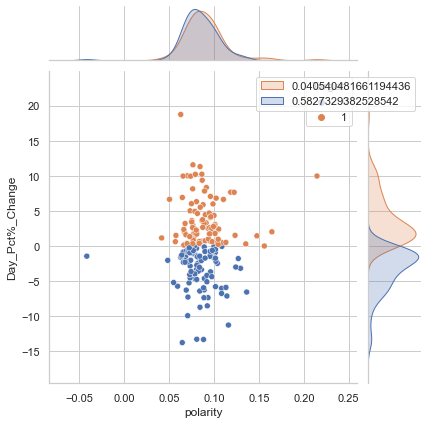

In [12]:
from scipy.stats import stats

sns.jointplot(bitcoin_master_df["polarity"],bitcoin_master_df["Day_Pct%_Change"],hue =bitcoin_master_df["Target"])

plt.legend(stats.pearsonr(bitcoin_master_df["Day_Pct%_Change"],bitcoin_master_df["polarity"]))


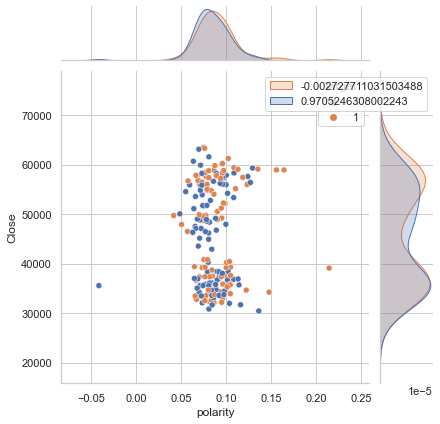

In [13]:
from scipy.stats import stats

sns.jointplot(bitcoin_master_df["polarity"],bitcoin_master_df["Close"],hue =bitcoin_master_df["Target"])

plt.legend(stats.pearsonr(bitcoin_master_df["Close"],bitcoin_master_df["polarity"]))


# CHECKING FOR MULTICOLLINEARITY AND HEAT MAP ANALYSIS FOR CORRELATION BETWEEN VARIABLES 

<AxesSubplot:>

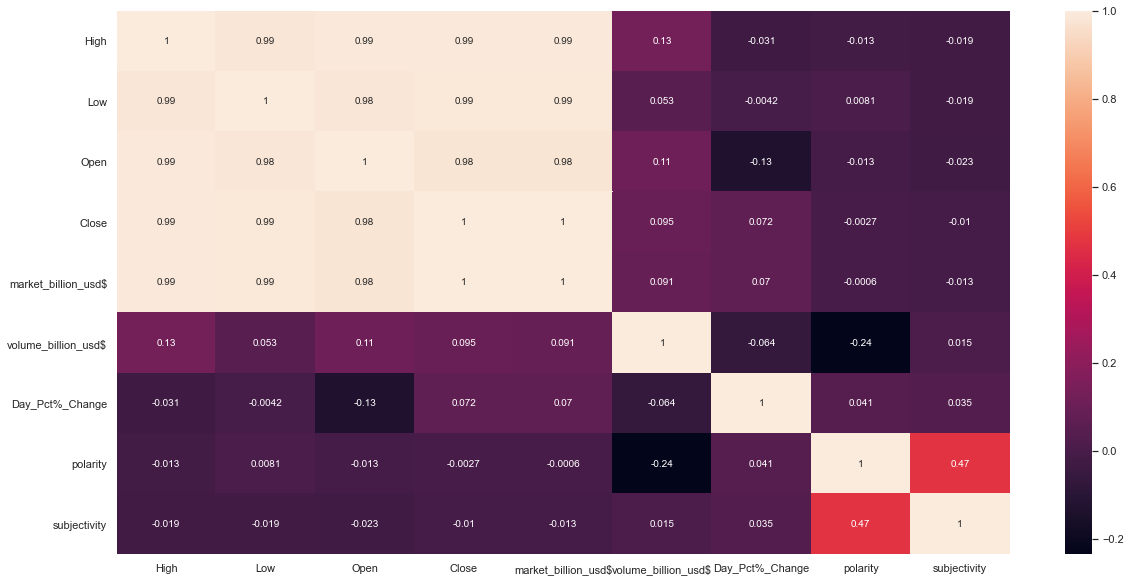

In [14]:



plt.figure(figsize=(20,10))
sns.heatmap(bitcoin_master_df.corr(),annot=True)

In [15]:
#there seems to be high correlation between high ,open ,close ,market_billion among each other 

#so if we want to apply logistic regression then we need to drop this variables 

# bitcoin_master_df.drop(["Open","Low","High"],axis = 1 ,inplace =True)

# bitcoin_master_df

# plt.figure(figsize=(20,10))
# sns.heatmap(bitcoin_master_df.corr(),annot=True)

In [16]:
#there seems to be high correlation between high ,open ,close ,market_billion among each other 

#so if we want to apply logistic regression then we need to drop this variables 

# bitcoin_master_df.drop(["market_billion_usd$"],axis = 1 ,inplace =True)

# bitcoin_master_df

# plt.figure(figsize=(20,10))
# sns.heatmap(bitcoin_master_df.corr(),annot=True)

# Applying Machine Learning Models 


# Since we have output as categorical variable as we want to predict the rise and fall of crypto currencies 

# so we go for supervised classification machine learning algorithms 



# 1. Logistic Regression Model 

In [17]:
bitcoin_master_df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


In [18]:
bitcoin_master_df.dtypes

Name                           object
Symbol                         object
Date                   datetime64[ns]
High                          float64
Low                           float64
Open                          float64
Close                         float64
market_billion_usd$             int64
volume_billion_usd$           float64
Day_Pct%_Change               float64
Trend                          object
Target                       category
polarity                      float64
subjectivity                  float64
dtype: object

In [19]:
bitcoin_master_df["Target"] = bitcoin_master_df["Target"].astype("int")

In [20]:
#Name ,symbol and Date are of no use so we will drop them and move for further analysing 

bitcoin_master_df.drop(["Name","Symbol","Date"],axis = 1,inplace =True)

bitcoin_master_df



,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


# Dummy Encode the Categorical Variables

# 1. Split the dependent and independent variables.

In [21]:
# store the target variable 'Target' in a dataframe 'df_target'
df_target = bitcoin_master_df['Target']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = bitcoin_master_df.drop('Target', axis = 1)

# 2. Filter numerical and categorical variables.

In [22]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['High', 'Low', 'Open', 'Close', 'market_billion_usd$',
       'volume_billion_usd$', 'Day_Pct%_Change', 'polarity', 'subjectivity'],
      dtype='object')

In [23]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['Trend'], dtype='object')

# The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

# **Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [24]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
dummy_var

,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0


# 3. Scale the Data 

# We scale the variables to get all the variables in the same range.

With this, we can avoid a problem in which some features come to dominate solely because 
they tend to have larger values than others.

In [25]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

df_num_scaled

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639
5,-0.693641,-0.724217,-0.874741,-0.626061,-0.642751,0.870665,1.380643,-0.973482,-0.940150
6,-0.517071,-0.689657,-0.620586,-0.483279,-0.497937,0.990631,0.703767,-0.510931,0.682130
7,-0.568091,-0.476576,-0.480249,-0.537633,-0.551572,0.053841,-0.314835,-0.303667,0.936207
8,-0.569706,-0.774603,-0.533558,-0.727610,-0.744657,0.699203,-1.010583,-0.345947,0.197899
9,-0.876955,-1.315207,-0.723852,-1.006832,-1.023557,2.241884,-1.536494,-0.699913,0.503219


In [26]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276,0,0,1,0,0,0,0,0
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619,0,0,0,0,1,0,0,0
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338,0,0,0,1,0,0,0,0
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211,0,0,0,0,0,0,0,0
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639,0,0,1,0,0,0,0,0


# 4. Train -Test -split 



Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.We devide the data into 70:30 ratio 

In [27]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
# X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (130, 17)
y_train (130,)
X_test (56, 17)
y_test (56,)


### Create a generalized function to create a dataframe containing the scores for the models.

In [28]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# <a id="logit"></a>
 # 3. Logistic Regression (Full Model)

Train accuracy: 0.98
Test accuracy: 0.93

Test confusion_matrix
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.86      0.92        28

    accuracy                           0.93        56
   macro avg       0.94      0.93      0.93        56
weighted avg       0.94      0.93      0.93        56



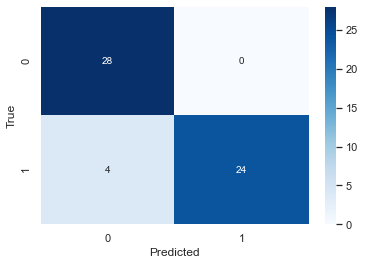

In [29]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# logreg = sm.Logit(y_train, X_train).fit()

# # print the summary of the model
# print(logreg.summary())


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_true,y_pred))

# REMOVING MULTICOLLINEARIY AND SELECTING FEATURES USING VIF TECHNIQUE 

In [30]:
# filter the numerical features in the dataset
df_numeric_features_vif = X.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276,0,0,1,0,0,0,0,0
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619,0,0,0,0,1,0,0,0
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338,0,0,0,1,0,0,0,0
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211,0,0,0,0,0,0,0,0
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639,0,0,1,0,0,0,0,0


In [31]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     1.079164                       High
1     1.192480        volume_billion_usd$
2     5.481956            Day_Pct%_Change
3     1.451269                   polarity
4     1.356949               subjectivity
5     1.925120     Trend_Among top losers
6     2.445521            Trend_Bear drop
7     2.919569             Trend_Bull run
8     1.204229             Trend_Negative
9     1.151400             Trend_Positive
10    1.030804      Trend_Slight Negative
11    1.010106      Trend_Slight Positive
12    1.032775  Trend_Slight or No change


In [32]:
vif["Features"].tolist()

['High',
 'volume_billion_usd$',
 'Day_Pct%_Change',
 'polarity',
 'subjectivity',
 'Trend_Among top losers',
 'Trend_Bear drop',
 'Trend_Bull run',
 'Trend_Negative',
 'Trend_Positive',
 'Trend_Slight Negative',
 'Trend_Slight Positive',
 'Trend_Slight or No change']

<AxesSubplot:>

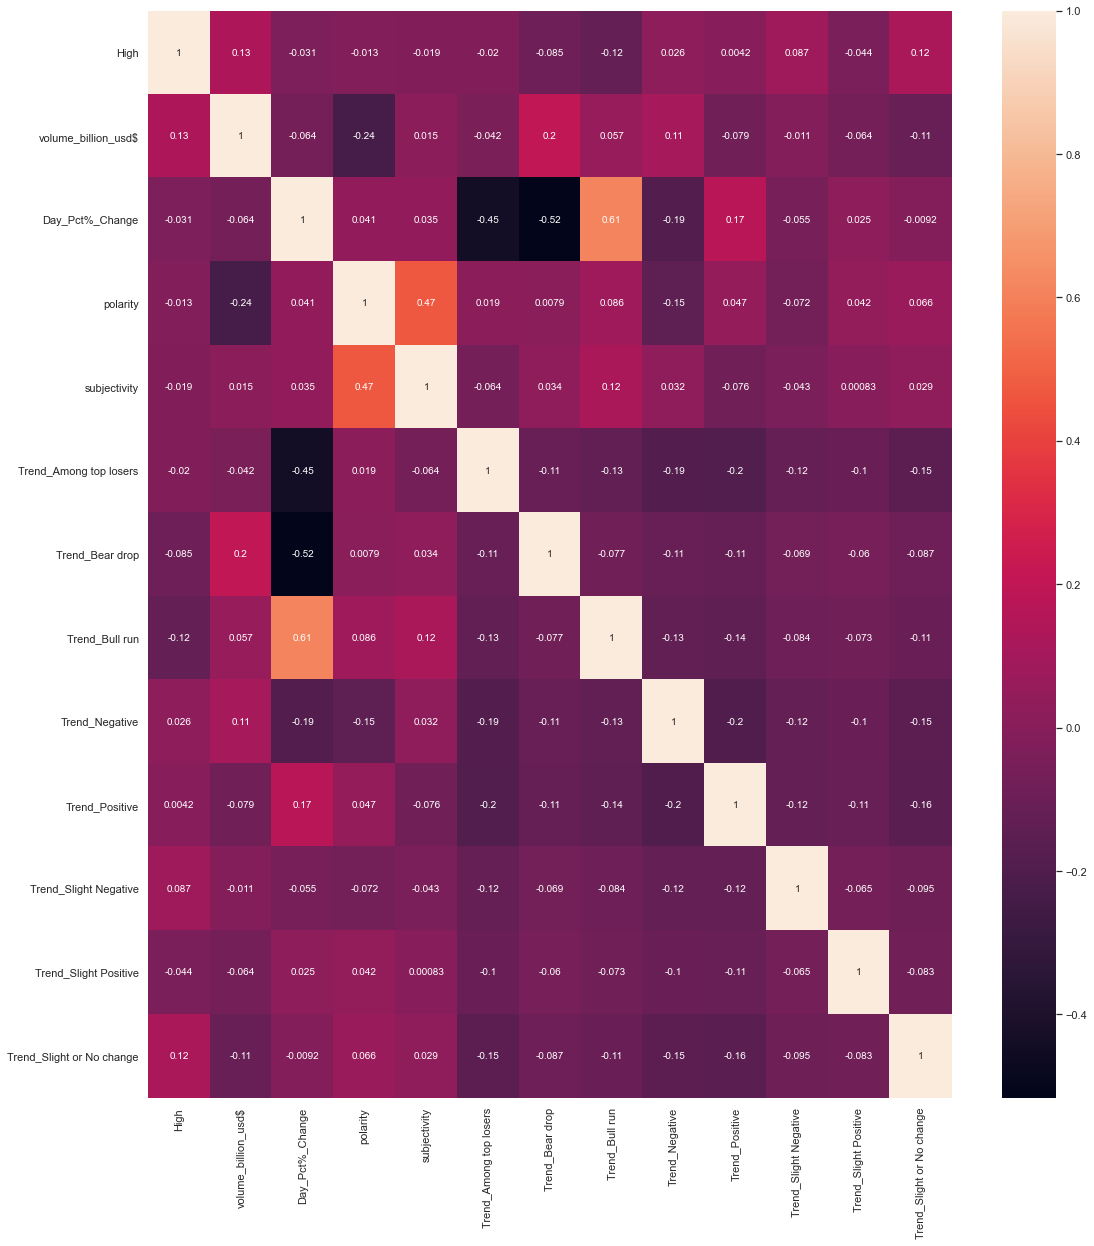

In [33]:
plt.figure(figsize=(18,20))
sns.heatmap(df_numeric_features_vif[vif.Features].corr(),annot=True)

X_train (130, 13)
y_train (130,)
X_test (56, 13)
y_test (56,)
Train accuracy: 0.98
Test accuracy: 0.93

Test confusion_matrix
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.86      0.92        28

    accuracy                           0.93        56
   macro avg       0.94      0.93      0.93        56
weighted avg       0.94      0.93      0.93        56



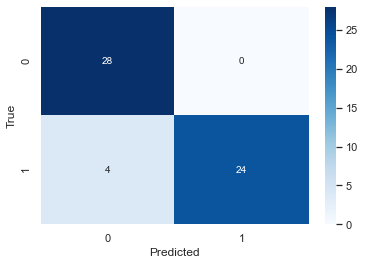

In [34]:
#Bulding a full model  from variables obtained from VIF 


X = X[vif.Features] 



X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_true,y_pred))





In [35]:
#SO AGAIN FULL - MODEL OBTAINED FROM VIF VARIABLES SEEMS TO BE OVERFITTING 



# TAKING RANDOMLY SOME OF THE VARIABLES AND TRYING OUT THE ACCURACY AND OTHER PARAMENTERS 

X_train (130, 4)
y_train (130,)
X_test (56, 4)
y_test (56,)
Train accuracy: 0.77
Test accuracy: 0.62

Test confusion_matrix
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.63      0.61      0.62        28

    accuracy                           0.62        56
   macro avg       0.63      0.62      0.62        56
weighted avg       0.63      0.62      0.62        56



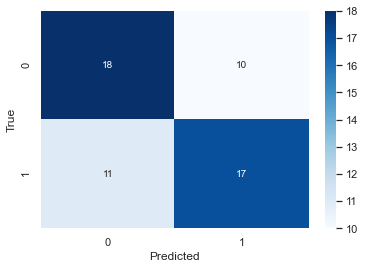

In [36]:
#Bulding a  model  from variables obtained from VIF 

X = pd.concat([df_num_scaled, dummy_var], axis = 1)

X = X[["High","volume_billion_usd$","market_billion_usd$","polarity"]] 



X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_true,y_pred))





#LET'S FIT THE ABOVE MODEL WITH  SM.LOGIT AND SEE THE MODEL SUMMARYY

In [37]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model

X = pd.concat([df_num_scaled, dummy_var], axis = 1)

X = X[["High","volume_billion_usd$","market_billion_usd$","polarity"]] 


X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)



logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

X_train (130, 5)
y_train (130,)
X_test (56, 5)
y_test (56,)
Optimization terminated successfully.
         Current function value: 0.351460
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  130
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                  0.4929
Time:                        11:07:57   Log-Likelihood:                -45.690
converged:                       True   LL-Null:                       -90.094
Covariance Type:            nonrobust   LLR p-value:                 2.359e-18
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6268

# IF WE COMPARE THE MODEL SUMMARY OBTAINED FROM ABOVE VARIABLES COMBINATION :--

["High", "volumne_billion_usd$", "market_billion_usd$", "polarity"]

# we got some moderate accuracy of 77% on training dataset and 62% on testing dataset 
#by looking at the accuracy we still can say the model is little overfitted as testing errors are more 
#but low accuracy on training and testing part is also might due to less training data so that why our model is not able to 
#find some of the patterns 

#Also if we compare the p-value obtained from the model summary from wald test 
#we find that market_billion_usd$,volume_billion_usd$,High,Polarity seems to be significant features in predicting 
#the rise and fall of crypto as there p_value<alpha(0.05)

Significance of coefficients -Wald test

#############################################


●For β to be significant, β > 0.
    H0 : β = 0    against      
    H1: β ≠ 0
    
    
●It implies
          H0: The parameter β is not significantagainst
          H1: The parameter β is significant
          
          
                
●Failing to reject H0implies that the parameter β is not significant


#so looking at the p - values for variables from above model summary we find 

#variables :--[market_billion_usd ,𝑣𝑜𝑙𝑢𝑚𝑒_𝑏𝑖𝑙𝑙𝑖𝑜𝑛_𝑢𝑠𝑑$ ,High,Polarity] these are significant features in predicting the
trend of cryptocurrency market 

#p-value for all of these variables is less than alpha or p<0.05 which implies rejecting null-hypothesis 
#and accept alternate hypothesis which states variables are significant 


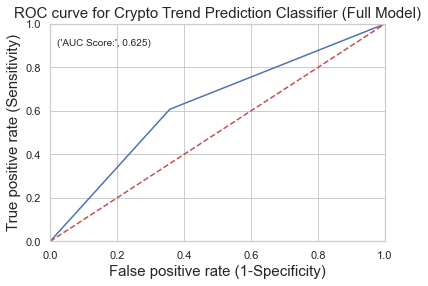

In [38]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Crypto Trend Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

In [39]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.25


In [40]:
logreg.aic

101.37964994783894

# Hyperparameter Optimization for the Logistic Regression Model

Model parameters (such as weight, bias, and so on) are learned from data, whereas hyperparameters specify how our model should be organized. The process of finding the optimum fit or ideal model architecture is known as hyperparameter tuning. Hyperparameters control the overfitting or underfitting of the model. Hyperparameter tuning can be done using algorithms like Grid Search or Random Search.

We will use Grid Search which is the most basic method of searching optimal values for hyperparameters. To tune hyperparameters, follow the steps below:

Create a model instance of the Logistic Regression class

Specify hyperparameters with all possible values

Define performance evaluation metrics

Apply cross-validation

Train the model using the training dataset

Determine the best values for the hyperparameters given.

We can use the below code to implement hyperparameter tuning in python using the Grid Search method.

In [41]:
#Hyperparameter tuning
# define model/create instance
from sklearn.model_selection import StratifiedKFold
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [42]:
#After fitting the model, we will extract the best fit values for all specified hyperparameters.

# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.8441300717162786
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.5217835671342685, 1: 0.47821643286573146}, 'penalty': 'l2'}


In [43]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0: 0.5217835671342685, 1: 0.47821643286573146},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20,
                   class_weight={0: 0.5217835671342685, 1: 0.47821643286573146})

In [44]:
#Model evaluation 

# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", metrics.roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", metrics.precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", metrics.recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", metrics.f1_score(y_test,y_pred_test))
print("accuracy of test dataset : t",accuracy_score(y_test,y_pred_test))

confusion Matrix is :nn [[21  7]
 [11 17]]
n
ROC-AUC score  test dataset:  t 0.7908163265306122
precision score  test dataset:  t 0.7083333333333334
Recall score  test dataset:  t 0.6071428571428571
f1 score  test dataset :  t 0.6538461538461539
accuracy of test dataset : t 0.6785714285714286


In [45]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70        28
           1       0.71      0.61      0.65        28

    accuracy                           0.68        56
   macro avg       0.68      0.68      0.68        56
weighted avg       0.68      0.68      0.68        56



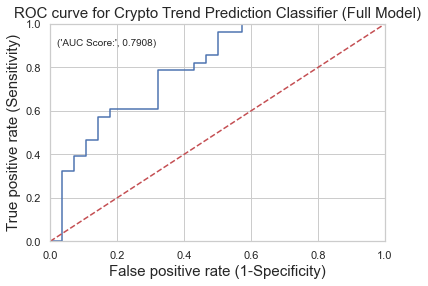

In [50]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Crypto Trend Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_test),4)))
                               
# plot the grid
plt.grid(True)

# The next step is to predict whether the value of a bitcoin will rise or fall looking  8 days into the future.

# Lets try out that below:--|


In [201]:
new_df = bitcoin_master_df.copy()

#droping old Target data 
new_df.drop(["Target"],axis = 1,inplace = True)

print("shape f dataframe:--",new_df.shape)
new_df.head()

shape f dataframe:-- (186, 10)


,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,polarity,subjectivity
0,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,0.086922,0.293221
1,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,0.067089,0.268607
2,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0.103779,0.302804
3,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,0.080542,0.268689
4,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,0.091530,0.317750


In [192]:
y = (new_df['Close'].shift(periods = -8,fill_value = 0) - new_df['Close'])  #shifting the data
y = (y > 0)

#remove last 8 rows, because of the shift
x = new_df[:-8]
y = y[:-8]

x.shape,y.shape

((178, 10), (178,))

In [193]:
x.tail()  #predictors 

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,polarity,subjectivity
173,35228.852610,32385.214700,33682.800400,34662.435890,650,33.123368,2.785654,Positive,0.099482,0.259658
174,35487.248000,31350.883860,34659.104500,31637.780060,593,40.230904,-8.726034,Bear drop,0.084450,0.262723
175,32637.587190,30184.501790,31594.663570,32186.277670,603,38.585386,1.733679,Positive,0.095212,0.268682
176,34656.127360,32071.757150,32287.523210,34649.644590,649,35.511641,7.653469,Bull run,0.122477,0.302037
177,35219.891790,33902.075890,34679.122220,34434.335310,645,33.892524,-0.621390,Slight Negative,0.098174,0.259358


In [203]:

y = y.map({True : 1 ,False:0})
print(y.shape)
print(y.value_counts())
y.head() #Target values 

#dataset seems to be balanced looking at the value counts of y

(178,)
1    91
0    87
Name: Close, dtype: int64


0    1
1    1
2    1
3    1
4    1
Name: Close, dtype: int64

In [195]:
# store the target variable 'Target' in a dataframe 'df_target'
df_target = y

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column


df_feature = x



# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns


# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns



# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
dummy_var.head()



,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [196]:

# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

df_num_scaled





# # concat the dummy variables with numeric features to create a dataframe of all independent variables
# # 'axis=1' concats the dataframes along columns 
# X = pd.concat([df_num_scaled,dummy_var], axis = 1)

# # display last five observations

# X.tail()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,-1.463784,-1.508505,-1.678471,-1.410243,-1.424456,0.218746,1.857762,0.016557,0.781006
1,-1.316993,-1.213452,-1.402158,-1.344275,-1.359713,0.607634,0.370556,-0.853165,-0.238421
2,-1.434990,-1.545216,-1.333752,-1.425895,-1.440641,0.697593,-0.543761,0.755797,1.177885
3,-1.334260,-1.395909,-1.417451,-1.222324,-1.235624,0.207292,1.238731,-0.263202,-0.235014
4,-1.087616,-1.067804,-1.213041,-0.937002,-0.949678,0.486076,1.646579,0.218636,1.796901
5,-0.754262,-0.771155,-0.929972,-0.680420,-0.696103,0.827176,1.359597,-0.954617,-0.962619
6,-0.575865,-0.736534,-0.674241,-0.536690,-0.550432,0.947639,0.692020,-0.490316,0.658915
7,-0.627413,-0.523077,-0.533034,-0.591405,-0.604384,0.006969,-0.312589,-0.282269,0.912877
8,-0.629045,-0.821629,-0.586673,-0.782643,-0.798612,0.655004,-0.998780,-0.324708,0.174907
9,-0.939472,-1.363186,-0.778148,-1.063718,-1.079163,2.204075,-1.517467,-0.680014,0.480087


X_train (124, 4)
y_train (124,)
X_test (54, 4)
y_test (54,)
Train accuracy: 0.65
Test accuracy: 0.56

Test confusion_matrix
              precision    recall  f1-score   support

           0       0.46      0.90      0.61        21
           1       0.85      0.33      0.48        33

    accuracy                           0.56        54
   macro avg       0.65      0.62      0.55        54
weighted avg       0.70      0.56      0.53        54



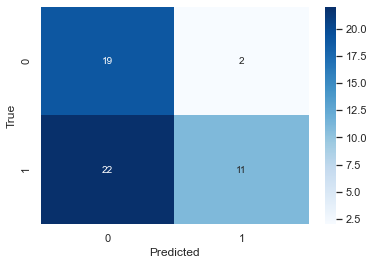

In [197]:
#bulding a model 

X = pd.concat([df_num_scaled, dummy_var], axis = 1)

X = X[["High","market_billion_usd$","volume_billion_usd$","polarity"]] 

#X[["High","volume_billion_usd$","market_billion_usd$","polarity"]] 

X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_true,y_pred))





## Lets try out the same above model with sm.logit to see the model summary and compare the significance 

In [198]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model

X = pd.concat([df_num_scaled, dummy_var], axis = 1)

X = X[["High","volume_billion_usd$","market_billion_usd$","polarity"]] 


X = sm.add_constant(X)


X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)



logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

X_train (124, 5)
y_train (124,)
X_test (54, 5)
y_test (54,)
Optimization terminated successfully.
         Current function value: 0.663125
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Close   No. Observations:                  124
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Oct 2021   Pseudo R-squ.:                 0.04043
Time:                        12:05:16   Log-Likelihood:                -82.228
converged:                       True   LL-Null:                       -85.692
Covariance Type:            nonrobust   LLR p-value:                    0.1397
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1597

In [199]:
# Here we got the accuracy score of 66% on Training data and 56% on testing data which clearly shows overfitting of the model 
#Also we found that variables combination that we have taken are not that much significant in predicting the target variable
#Next we will try to use different classification techniques such as decision tree to see how they perform on this variable combination
#and will compare which model performed best with respect to all the above work we tried to do 

In [200]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred)

# print the kappa value
print('kappa value:',kappa)


#with kappa value there seems to be moderate interaction involved out 

kappa value: 0.20295202952029534


# Next we will try to include other algorithms to test improvements in model accuracy and to see what algorithms works well in our scenario.